In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from main import eda, cross_validation, rmse, rmsle
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

np.set_printoptions(suppress=True, formatter={'float_kind':'{:.2f}'.format})
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
wine = pd.read_csv('winequality-red.csv', delimiter=";")

In [9]:
df.shape

(1599, 12)

In [12]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
df.isna().sum().sort_values()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
X = wine.drop(columns = ['quality'])
y = wine.quality
#y = df.pop('quality')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state= 15)
model= LinearRegression().fit(X_train, y_train)
y_hat = model.predict(X_test)
r2_score(y_test,y_hat)

0.3071213019576028

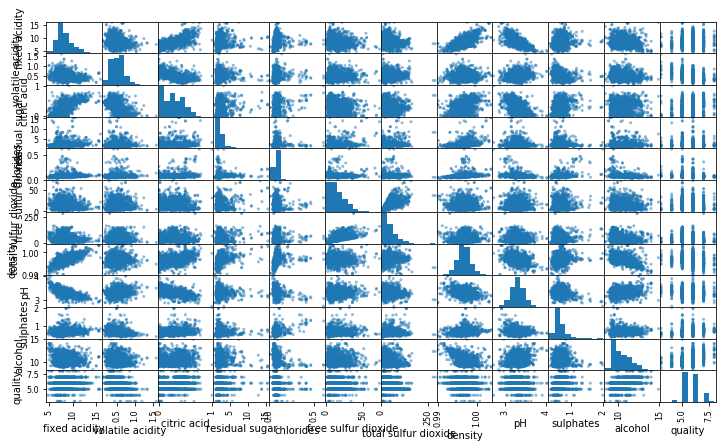

In [78]:
scatter_matrix(wine, figsize=(12,7));

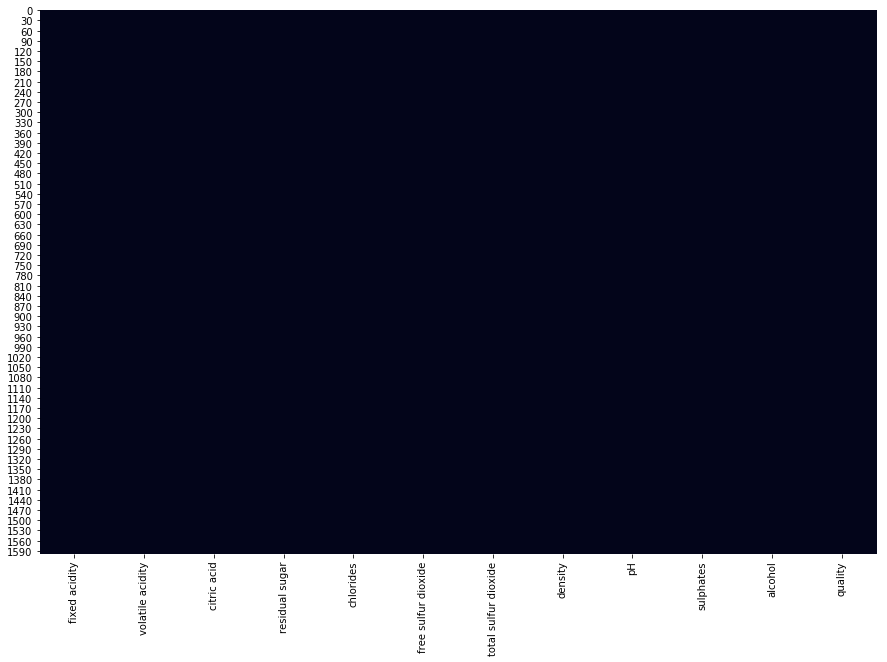

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(~wine.isna(), cbar=False);

In [54]:
x_scalar = StandardScaler().fit(X)
X_scaled = x_scalar.transform(X)
X_scaled[0]

array([-0.53, 0.96, -1.39, -0.45, -0.24, -0.47, -0.38, 0.56, 1.29, -0.58,
       -0.96])

In [60]:
X_sc = pd.DataFrame(X_scaled)

In [61]:
X_sc

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294


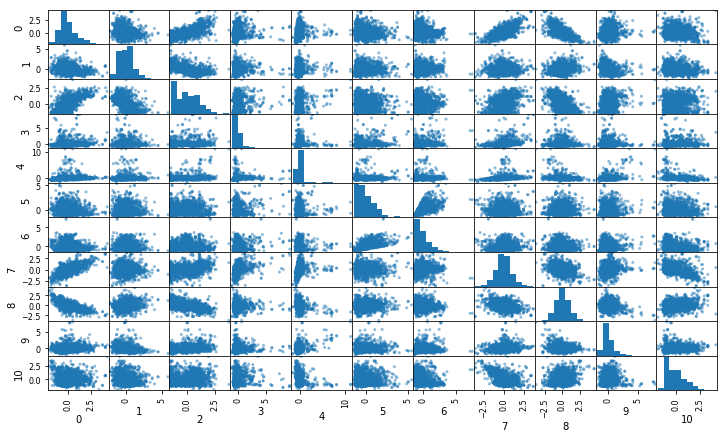

In [62]:
scatter_matrix(X_sc, figsize=(12,7));

In [63]:
cross_validation(LinearRegression(), X.values, y, 10, [r2_score, rmse, rmsle])

array([0.24, 0.66, 0.10])

In [64]:
cross_validation(LinearRegression(), X_scaled, y, 10, [r2_score, rmse, rmsle])

array([0.24, 0.66, 0.10])

In [47]:
for α in np.logspace(-4, 4, 9):
    print(α, cross_validation(Ridge(alpha=α), X_scaled, y, 10, [r2_score, rmse, rmsle]))

0.0001 [0.24 0.66 0.10]
0.001 [0.24 0.66 0.10]
0.01 [0.24 0.66 0.10]
0.1 [0.24 0.66 0.10]
1.0 [0.24 0.66 0.10]
10.0 [0.24 0.66 0.10]
100.0 [0.24 0.66 0.10]
1000.0 [0.22 0.67 0.10]
10000.0 [0.00 0.76 0.12]


In [48]:
for α in np.logspace(-4, 4, 9):
    print(α, cross_validation(Lasso(alpha=α), X_scaled, y, 10, [r2_score, rmse, rmsle]))

0.0001 [0.24 0.66 0.10]
0.001 [0.24 0.66 0.10]
0.01 [0.24 0.66 0.10]
0.1 [0.20 0.68 0.10]
1.0 [-0.13 0.81 0.12]
10.0 [-0.13 0.81 0.12]
100.0 [-0.13 0.81 0.12]
1000.0 [-0.13 0.81 0.12]
10000.0 [-0.13 0.81 0.12]


In [67]:
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


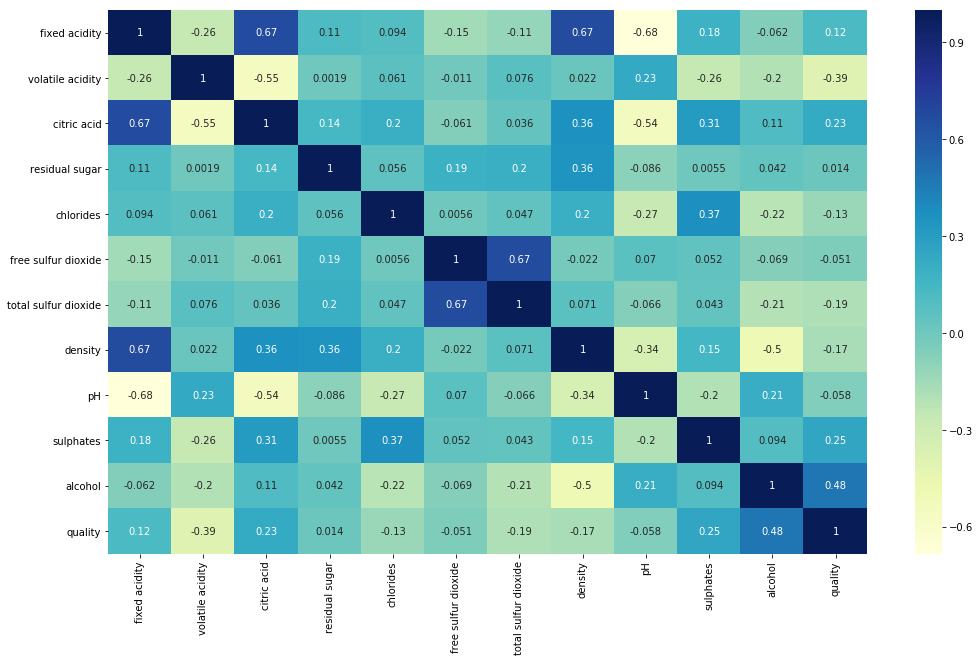

In [68]:
plt.figure(figsize=(17, 10))
sns.heatmap(corr, annot=True, cbar=True, cmap='YlGnBu');

In [73]:
y = wine.quality
X = wine.drop(columns=['residual sugar', 'quality',])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     8869.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:37:07   Log-Likelihood:                -1192.1
No. Observations:                1199   AIC:                             2404.
Df Residuals:                    1189   BIC:                             2455.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0032      0.019      0.167      0.867      -0.034       0.041
volatile acidity        -1.0220      0.140     -7.301      0.000      -1.297      -0.747
citric acid             -0.1350      0.172     -0.787      0.431      -0.472       0.202
chlorides               -1.7808      0.471     -3.781      0.000      -2.705      -0.857
free sulfur dioxide      0.0052      0.003      2.018      0.044       0.000       0.010
total sulfur dioxide    -0.0037      0.001     -4.375      0.000      -0.005      -0.002
density                  4.2080      0.724      5.811      0.000       2.787       5.629
pH                      -0.4428      0.186     -2.387      0.017      -0.807      -0.079
sulphates                0.7928      0.126      6.309      0.000       0.546       1.039
alcohol                  0.3050      0.020     15.011      0.000       0.265       0.345
==============================================================================
Omnibus:                       26.012   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.041
Skew:                          -0.179   Prob(JB):                     7.43e-10
Kurtosis:                       3.845   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
y_hat = results.predict(X_test)
r2_score(y_test, y_hat)

0.37159792841768713

In [88]:
y = wine.quality
X = wine.drop(columns=['residual sugar', 'quality', 'fixed acidity', 'free sulfur dioxide'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:47:40   Log-Likelihood:                -1194.2
No. Observations:                1199   AIC:                             2404.
Df Residuals:                    1191   BIC:                             2445.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -1.0613      0.134     -7.921      0.000      -1.324      -0.798
citric acid             -0.1661      0.142     -1.169      0.243      -0.445       0.113
chlorides               -1.7624      0.453     -3.887      0.000      -2.652      -0.873
total sulfur dioxide    -0.0026      0.001     -4.371      0.000      -0.004      -0.001
density                  4.2423      0.538      7.880      0.000       3.186       5.299
pH                      -0.4366      0.155     -2.811      0.005      -0.741      -0.132
sulphates                0.8029      0.126      6.392      0.000       0.556       1.049
alcohol                  0.3073      0.020     15.186      0.000       0.268       0.347
==============================================================================
Omnibus:                       25.415   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.040
Skew:                          -0.184   Prob(JB):                     2.02e-09
Kurtosis:                       3.816   Cond. No.                     1.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
y_hat = results.predict(X_test)
r2_score(y_test, y_hat)

0.37045097558612616

In [96]:

x_scalar = StandardScaler().fit(X)
X_scaled = x_scalar.transform(X)
X_scaled[0]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)

In [98]:
#KNN 
knn = KNeighborsRegressor(n_neighbors= 5, weights = 'uniform')
knn.fit(X_train, y_train) 
y_hat_knn = knn.predict(X_test)
y_hat_knn

array([5.20, 5.20, 5.40, 5.80, 5.80, 5.20, 5.00, 5.00, 6.40, 5.80, 6.80,
       5.60, 5.80, 5.80, 5.60, 6.60, 5.20, 6.00, 6.40, 5.20, 4.80, 6.00,
       5.20, 6.20, 5.80, 5.60, 6.20, 5.40, 5.00, 6.20, 5.20, 5.00, 5.80,
       5.20, 5.20, 5.20, 6.20, 6.20, 5.60, 6.40, 5.60, 5.00, 7.00, 5.20,
       6.00, 5.60, 6.40, 5.60, 5.00, 6.20, 5.00, 5.20, 5.80, 7.20, 5.20,
       5.20, 6.00, 5.40, 5.60, 5.00, 5.60, 6.00, 5.20, 5.40, 6.80, 5.60,
       6.40, 5.80, 6.60, 5.60, 6.40, 4.80, 5.80, 5.60, 6.20, 5.00, 6.80,
       5.40, 6.20, 6.60, 5.20, 6.80, 5.40, 5.00, 6.00, 5.80, 5.20, 5.80,
       6.20, 5.80, 5.60, 5.00, 5.40, 5.80, 5.80, 5.60, 5.80, 5.60, 5.80,
       5.40, 5.60, 5.00, 5.40, 5.20, 5.20, 6.20, 5.80, 5.00, 5.40, 5.20,
       6.60, 5.00, 6.00, 5.00, 5.20, 5.80, 5.80, 5.60, 5.00, 5.60, 6.60,
       5.40, 6.20, 5.80, 6.00, 5.80, 6.40, 5.80, 5.40, 5.20, 5.80, 5.40,
       5.00, 6.80, 6.20, 5.00, 5.00, 5.20, 5.20, 6.00, 6.00, 6.40, 6.40,
       5.80, 6.00, 5.20, 5.40, 5.00, 5.60, 5.00, 5.

In [101]:
r2 = r2_score(y_test, y_hat_knn)
r2

0.3169992422328872